## CS109  Home Work 1 

In [1]:
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np

In [2]:
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = BytesIO(r)
    zf = ZipFile(s, 'r') # Read in a list of zipped files
    return zf

In [3]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
type(zf)

zipfile.ZipFile

In [4]:
#dir(zf)
salaries_str = str(zf.read("Salaries.csv"))
salaries_str[:100]

"b'yearID,teamID,lgID,playerID,salary\\r\\n1985,BAL,AL,murraed02,1472819\\r\\n1985,BAL,AL,lynnfr01,109000"

In [5]:
salaries_str =salaries_str.replace('\\r\\n',',')
salaries_str = salaries_str[2:-2]
salaries_str[:100]

'yearID,teamID,lgID,playerID,salary,1985,BAL,AL,murraed02,1472819,1985,BAL,AL,lynnfr01,1090000,1985,B'

In [6]:
salaries_list = salaries_str.split(',')
salaries_list[:10]

['yearID',
 'teamID',
 'lgID',
 'playerID',
 'salary',
 '1985',
 'BAL',
 'AL',
 'murraed02',
 '1472819']

In [7]:
nrows = int(len(salaries_list)/5 -1)
nrows

23956

In [8]:
salaries = pd.DataFrame(data = np.array(salaries_list[5:]).reshape(nrows,5), columns=salaries_list[:5])

salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [9]:
## reading Teams.csv
teams_str = str(zf.read('Teams.csv'))
teams_str =teams_str.replace('\\r\\n',',') 
teams_str = teams_str[2:-2]
teams_list = teams_str.split(',')
#teams_list[:48]

nrows = int(len(teams_list)/48 -1)
nrows

2745

In [10]:
teams = pd.DataFrame(data = np.array(teams_list[48:]).reshape(nrows, 48), columns = teams_list[:48])

In [11]:
any(teams.isna())

True

In [12]:
len(teams)

2745

In [13]:
## other way
salaries =pd.read_csv(zf.open("Salaries.csv"))
teams = pd.read_csv(zf.open("Teams.csv"))

In [14]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [25]:
salaries_grouped =salaries.groupby(['yearID','teamID'], as_index=False).sum()
salaries_grouped.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [30]:
merged_df = pd.merge(salaries_grouped, teams, how = "inner", on = ['teamID', 'yearID'])[['teamID', 'yearID','salary','W']]

In [31]:
merged_df.head()

,teamID,yearID,salary,W
0,ATL,1985,14807000,66
1,BAL,1985,11560712,83
2,BOS,1985,10897560,81
3,CAL,1985,14427894,90
4,CHA,1985,9846178,85


In [33]:
%matplotlib inline 

import matplotlib.pyplot as plt

In [34]:
np.unique(merged_df.teamID, return_counts=True)

(array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN',
        'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIA',
        'MIL', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT',
        'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'],
       dtype=object),
 array([ 8, 16, 29, 29, 29, 12, 29, 29, 29, 29, 21, 29, 19, 29, 29,  9, 29,
         2, 16, 29, 13, 20, 29, 29, 29, 29, 29, 29, 29, 29, 29, 16, 29, 29,
         9]))

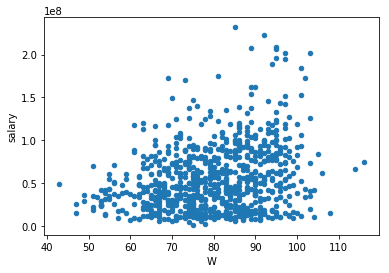

In [36]:
merged_df.plot.scatter(x='W', y='salary')